# Install neccessary dependencies

## Source code
#### small_probs: https://github.com/wlad111/small_probs
#### pymc3_ext: https://github.com/wlad111/pymc3
---



In [1]:
pip install git+https://github.com/wlad111/pymc3.git

  Cloning https://github.com/wlad111/pymc3.git to /tmp/pip-req-build-sln3txzk
  Running command git clone -q https://github.com/wlad111/pymc3.git /tmp/pip-req-build-sln3txzk
  Created wheel for pymc3-ext: filename=pymc3_ext-0.0.1-py3-none-any.whl size=422100 sha256=512f7ca510f96a8f5c1ff6c55fa955cf89b941327f7f2db3b974cff1bf72f9f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-cw78mxf_/wheels/b6/34/05/50b743ce080e2c52e89f2785ff734a3a1833fc2c4bb73f4157
Successfully built pymc3-ext
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install git+https://github.com/wlad111/small_probs.git

  Cloning https://github.com/wlad111/small_probs.git to /tmp/pip-req-build-9dx7t2uy
  Running command git clone -q https://github.com/wlad111/small_probs.git /tmp/pip-req-build-9dx7t2uy
  Created wheel for small-probs-wlad111: filename=small_probs_wlad111-0.0.1-py3-none-any.whl size=3372 sha256=87d96a35e0aa04aac07a8a52ca77a38bd027eb11c08e6beb026946548ff76122
  Stored in directory: /tmp/pip-ephem-wheel-cache-e_sxckds/wheels/0b/f2/60/41cbe5abac7cf4da582c50b2b45b464ebcd087893696e01836
Successfully built small-probs-wlad111
Note: you may need to restart the kernel to use updated packages.


In [0]:
pip install nose

     |████████████████████████████████| 163kB 2.8MB/s 


In [0]:
pip install arviz

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 16.3MB/s 
     |████████████████████████████████| 327kB 29.7MB/s 


In [0]:
from small_probs.probability import ProbabilityEstimator
from scipy.spatial.distance import hamming
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

#Users code with proposal, score, initial value


In [0]:
class string2:


    def __init__(self, length):
        self.n_letters = length
        self.state_fixed = np.array(["A"] * self.n_letters)
        alphabet = frozenset("ATGC")
        self.letters_list = list(alphabet)
        self.proposed = 0
        self.propose_letters = np.random.choice(a=self.letters_list, size=100000)
        self.propose_positions = np.random.choice(a=self.n_letters, size=100000)

    def score(self, state):
        return self.n_letters - np.sum(state != self.state_fixed)

    def proposal(self, state):
        if (self.proposed == 100000):
            self.propose_letters = np.random.choice(a=self.letters_list, size=100000)
            self.propose_positions = np.random.choice(a=self.n_letters, size=100000)
            self.proposed = 0
        state[self.propose_positions[self.proposed]] = self.propose_letters[self.proposed]
        self.proposed += 1
        return state


#Simulating markov chain

In [0]:
s2 = string2(10)
    
ps = ProbabilityEstimator(p=None, scorefun=s2.score, proposal=s2.proposal, default_val=s2.state_fixed, initial_weights=np.array([2] * 11), save_trace=True)
ps.estimate_between(10, 11)


Sequential sampling (1 chains in 1 job)
GenericCatMetropolis: [S]


In [0]:
gamma = 0.95

#Confidence interal and variance estimae

In [0]:
print("True value: ", 1/4**10)
print("Probability estimation: ", ps.prob)
print("OBM variance estimation: ", ps.var)
print(gamma, " confidence interval for true probability ", ps.confint(0.95))


True value:  9.5367431640625e-07
Probability estimation:  9.735235035741608e-07
OBM variance estimation:  1.8743340848133425e-09
0.95  confidence interval for true probability  (8.886696456593089e-07, 1.0583773614890127e-06)


In [0]:
trace = ps.score_trace


#Plot trace


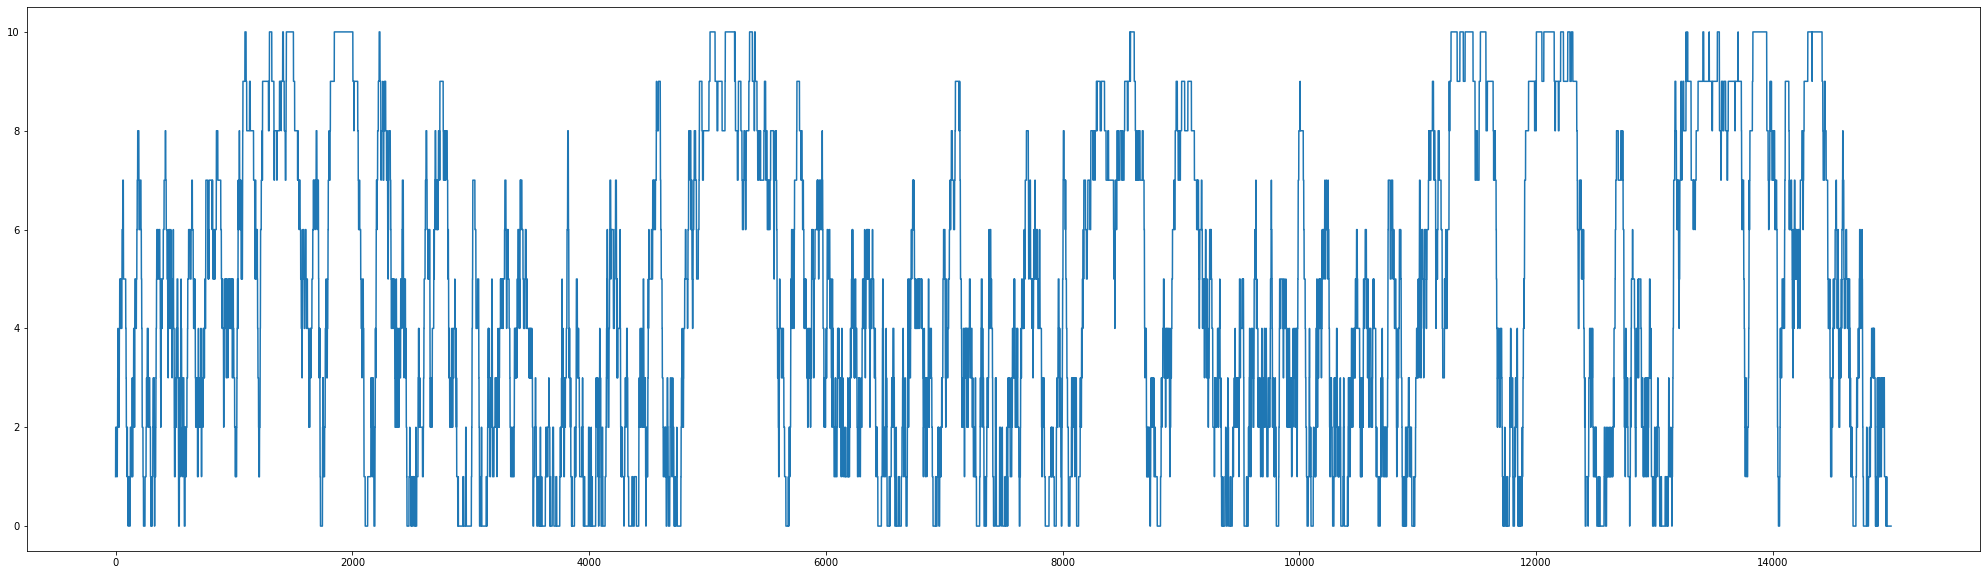

In [0]:
plt.figure(figsize=(35,10))
plt.plot(trace[-15000:])